In [1]:
import pandas as pd
import seaborn as sb

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = sb.load_dataset("diamonds")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [5]:
X = df[['carat','depth','table','x','y','z']]

In [6]:
y = df['price']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [9]:
import sklearn.linear_model as lin

In [10]:
model = lin.LinearRegression()

In [11]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
pred = model.predict(X_test)

In [13]:
import matplotlib.pyplot as plt

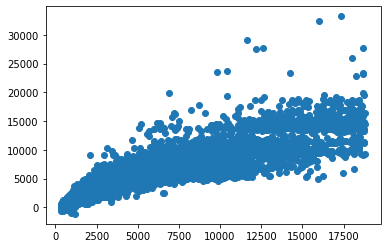

In [14]:
plt.scatter(y_test,pred)

(array([3.737e+03, 1.264e+03, 3.530e+02, 5.510e+02, 9.100e+01, 6.000e+00,
        6.000e+00, 1.000e+00, 4.000e+00, 2.000e+00]),
 array([ 5000.94455225,  7824.48495698, 10648.02536171, 13471.56576643,
        16295.10617116, 19118.64657589, 21942.18698062, 24765.72738534,
        27589.26779007, 30412.8081948 , 33236.34859953]),
 <BarContainer object of 10 artists>)

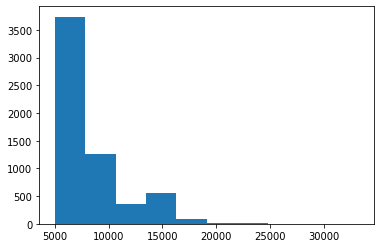

In [15]:
plt.hist(pred[pred>5000])

In [16]:
model.score(X_test,y_test)

0.8578126872700578

In [17]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [18]:
df2 = pd.get_dummies(df, columns=['color','cut','clarity'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
carat            53940 non-null float64
depth            53940 non-null float64
table            53940 non-null float64
price            53940 non-null int64
x                53940 non-null float64
y                53940 non-null float64
z                53940 non-null float64
color_D          53940 non-null uint8
color_E          53940 non-null uint8
color_F          53940 non-null uint8
color_G          53940 non-null uint8
color_H          53940 non-null uint8
color_I          53940 non-null uint8
color_J          53940 non-null uint8
cut_Fair         53940 non-null uint8
cut_Good         53940 non-null uint8
cut_Ideal        53940 non-null uint8
cut_Premium      53940 non-null uint8
cut_Very Good    53940 non-null uint8
clarity_I1       53940 non-null uint8
clarity_IF       53940 non-null uint8
clarity_SI1      53940 non-null uint8
clarity_SI2      53940 non-null uint8
clari

In [21]:
X = df2.drop('price',axis=1)

In [22]:
y = df2['price']

In [23]:
from sklearn import metrics

In [24]:
metrics.mean_absolute_error(y_test, pred)

895.5787784274943

In [25]:
import numpy as np

In [26]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

1499.0655250396123

In [27]:
model.intercept_

21011.96894163621

In [28]:
model.coef_

array([10647.16518416,  -206.00506891,  -103.50814556, -1476.43994261,
         256.02038521,    24.46522922])

In [29]:
m2 = lin.LinearRegression()

In [30]:
m2.coef_ = model.coef_.copy()

In [31]:
m2.intercept_ = model.intercept_.copy()

In [32]:
m2.predict(X_test)

array([7329.03534538,  758.51397356, 5476.10177146, ..., 1317.41042747,
       9575.51437796, 9670.33593199])